**Import Libraries**

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
print(tf.__version__)

2.4.0


**Creating Architecture**

In [ ]:
def discriminator_model():
  input_layer=keras.Input(shape=(720,1024,3))
  x=keras.layers.Conv2D(32,(11,11),strides=2)(input_layer)
  x=keras.layers.LeakyReLU()(x)
  x=keras.layers.Conv2D(64,(7,7),strides=2,kernel_regularizer=keras.regularizers.l2)(x)
  x=keras.layers.BatchNormalization()(x)
  x=keras.layers.LeakyReLU()(x)
  x=keras.layers.Conv2D(64,(5,5),kernel_regularizer=keras.regularizers.l2,strides=2)(x)
  x=keras.layers.BatchNormalization()(x)
  x=keras.layers.LeakyReLU()(x)
  x=keras.layers.Conv2D(128,(3,3),kernel_regularizer=keras.regularizers.l2,strides=2)(x)
  x=keras.layers.BatchNormalization()(x)
  x=keras.layers.LeakyReLU()(x)
  x=keras.layers.Conv2D(128,(3,3),kernel_regularizer=keras.regularizers.l2,strides=2)(x)
  x=keras.layers.BatchNormalization()(x)
  x=keras.layers.LeakyReLU()(x)
  x=keras.layers.Conv2D(128,(3,3),kernel_regularizer=keras.regularizers.l2,strides=2)(x)
  x=keras.layers.BatchNormalization()(x)
  x=keras.layers.LeakyReLU()(x)
  x=keras.layers.Conv2D(128,(3,3),kernel_regularizer=keras.regularizers.l2,strides=1)(x)
  x=keras.layers.BatchNormalization()(x)
  x=keras.layers.LeakyReLU()(x)
  x=keras.layers.Flatten()(x)
  x=keras.layers.Dense(1024,kernel_regularizer=keras.regularizers.l2,)(x)
  x=keras.layers.LeakyReLU()(x)
  x=keras.layers.Dense(256,kernel_regularizer=keras.regularizers.l2,)(x)
  x=keras.layers.LeakyReLU()(x)
  x=keras.layers.Dense(1,activation='sigmoid',kernel_regularizer=keras.regularizers.l2)(x)
  model=keras.Model(inputs=input_layer,outputs=x)
  return model

In [ ]:
def generator_block(i,filters):
    input_layer=keras.Input(shape=i.shape[1:])
    o=keras.layers.Conv2D(filters,(3,3),padding='same',kernel_regularizer=keras.regularizers.l2)(input_layer)
    o=keras.layers.BatchNormalization()(o)
    o=keras.layers.LeakyReLU()(o)
    o=keras.layers.Conv2D(filters,(3,3),padding='same',kernel_regularizer=keras.regularizers.l2)(o)
    o=keras.layers.BatchNormalization()(o)
    o=keras.layers.add([input_layer,o])
    model_block=keras.Model(inputs=input_layer,outputs=o)
    return model_block

def generator_model():
  inputs=keras.Input(shape=(180,256,3))
  x=keras.layers.Conv2D(32,(5,5),padding='same')(inputs)
  x=keras.layers.LeakyReLU()(x)
  skip=x
  x=generator_block(x,32)(x)
  x=generator_block(x,32)(x)
  x=keras.layers.Conv2D(64,(5,5),padding='same')(x)
  x=keras.layers.LeakyReLU()(x)
  x=generator_block(x,64)(x)
  x=generator_block(x,64)(x)
  x=keras.layers.Conv2D(64,(5,5),padding='same')(x)
  x=keras.layers.LeakyReLU()(x)
  x=generator_block(x,64)(x)
  x=generator_block(x,64)(x)
  x=keras.layers.Conv2D(64,(5,5),padding='same')(x)
  x=keras.layers.LeakyReLU()(x)
  x=generator_block(x,64)(x)
  x=generator_block(x,64)(x)
  x=keras.layers.Conv2D(32,(3,3),padding='same')(x)
  x=keras.layers.LeakyReLU()(x)
  x=keras.layers.BatchNormalization()(x)
  x=keras.layers.add([x,skip])
  x=keras.layers.Conv2DTranspose(32,(2,2),strides=4)(x)
  x=keras.layers.Conv2D(32,(3,3),padding='same')(x)
  x=keras.layers.LeakyReLU()(x)
  x=generator_block(x,32)(x)
  x=keras.layers.Conv2D(3,(3,3),padding='same',activation=keras.activations.sigmoid)(x)
  generator=keras.Model(inputs=inputs,outputs=x)
  return generator

**Images example**

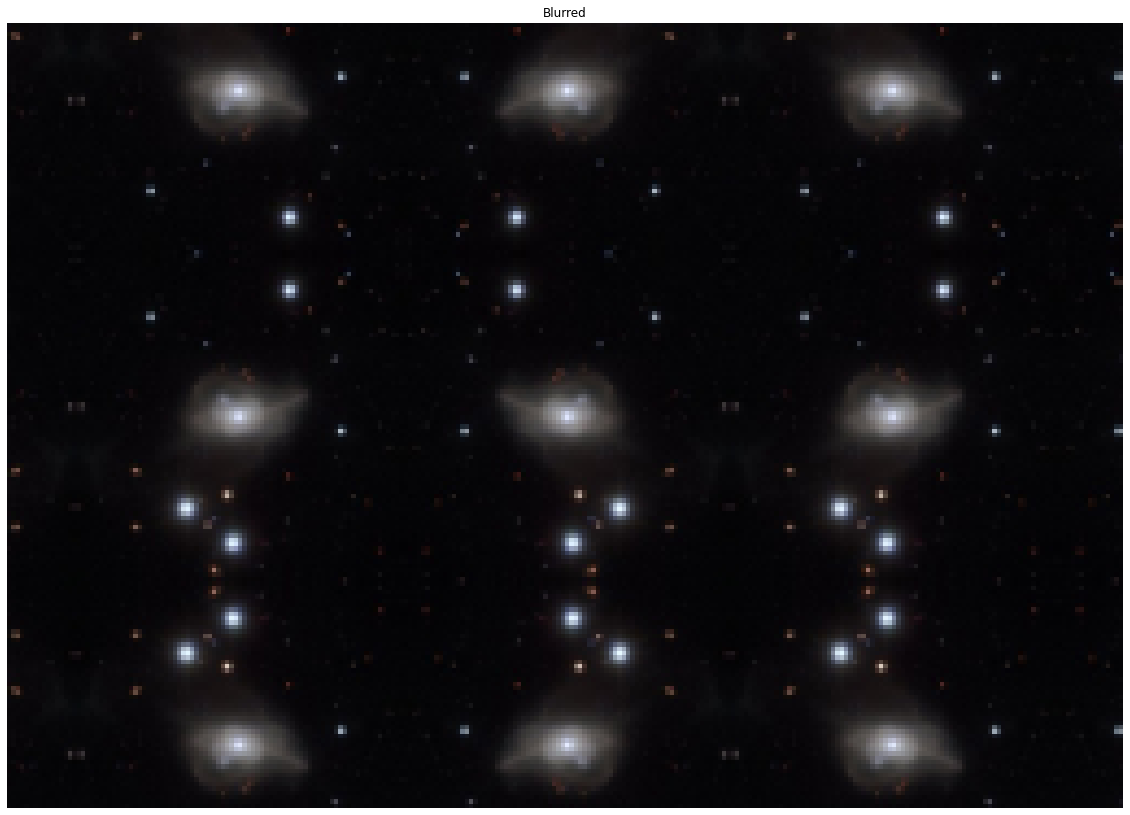

In [ ]:
img=Image.open('/content/drive/MyDrive/MemoryLane/Dataset_Human_Blur1/1 (1).jpg')
img = np.asarray( img, dtype="int32" )
img.reshape(1,720,1024,3)

plt.figure(figsize=(20, 20))
plt.title('Blurred')
plt.axis('off')
plt.imshow(img[::4,::4,:])

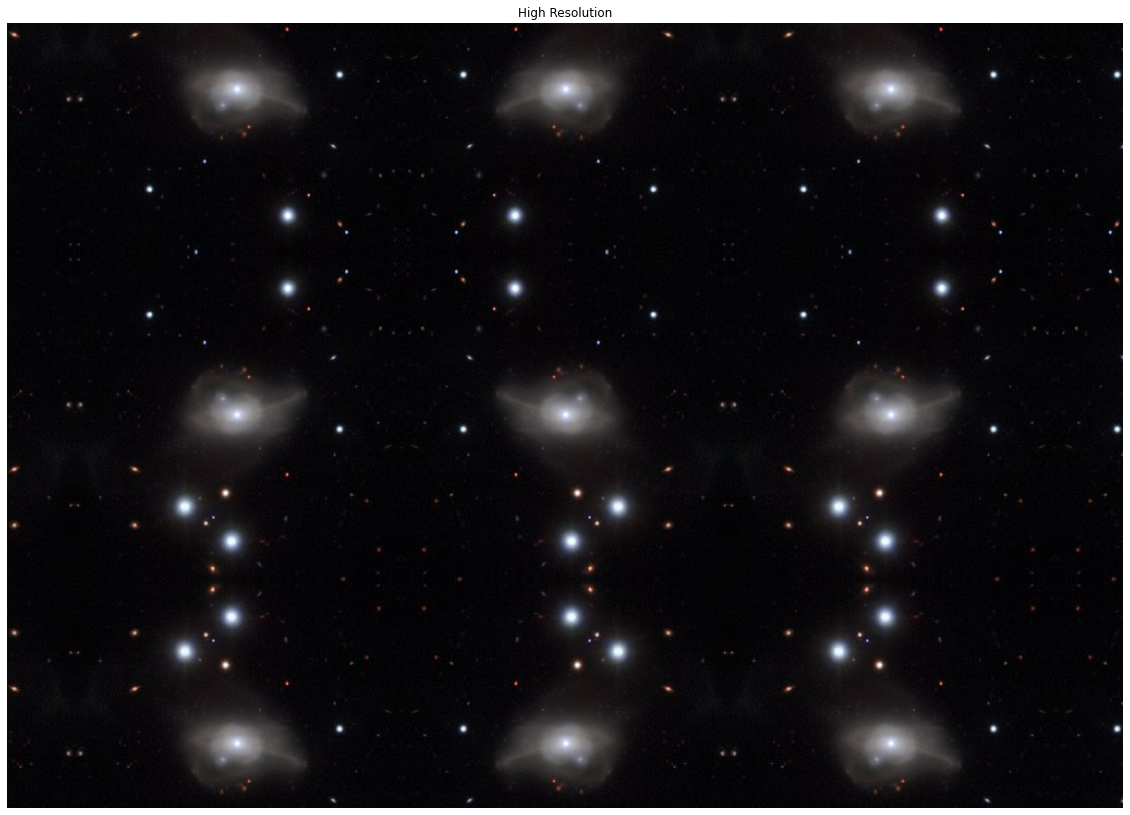

In [ ]:
img=Image.open('/content/drive/MyDrive/MemoryLane/Dataset_Human_Sharp1/1 (1).jpg')
img = np.asarray( img, dtype="int32" )
img.reshape(1,720,1024,3)
plt.figure(figsize=(20, 20))
plt.title('High Resolution')
plt.axis('off')
plt.imshow(img)

**Importing Images** 

In [ ]:
img_names=[i for i in os.listdir('/content/drive/MyDrive/MemoryLane/Dataset_Human_Sharp1')]
target_paths=['/content/drive/MyDrive/MemoryLane/Dataset_Human_Sharp1/'+i for i in img_names]
input_paths=['/content/drive/MyDrive/MemoryLane/Dataset_Human_Blur1/'+i for i in img_names]

In [ ]:
def getNumpyImages(paths,number):
  image = tf.keras.preprocessing.image.load_img(paths[0])
  input_arr = keras.preprocessing.image.img_to_array(image)
  input_arr=input_arr.reshape(1,720,1024,3)
  count=0
  for i in range(1,number):
    count+=1
    if(count%10==0):
      print('\b\b\b'+str(count),end='')
    image = tf.keras.preprocessing.image.load_img(paths[i])
    input_arr2 = keras.preprocessing.image.img_to_array(image)
    input_arr2=input_arr2.reshape(1,720,1024,3)
    input_arr=np.concatenate([input_arr,input_arr2],axis=0)
  return input_arr

In [ ]:
target_images_np=getNumpyImages(target_paths,300)

102030405060708090100110120130140150160170180190200210220230240250260270280290300310320330340350360370380390400410420430440450460470

In [ ]:
input_images_np=target_images_np[:,::4,::4,:]

In [ ]:
# target=np.load('/content/drive/MyDrive/SRGAN/target.npy')

Perceptual Loss for Generator using VGG19 (https://arxiv.org/pdf/1609.04802.pdf)

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg=VGG19(input_shape=(720,1024,3),include_top=False,weights='imagenet')
vgg_model_1=tf.keras.Model(inputs=vgg.inputs,outputs=vgg.get_layer(name='block3_conv4').output)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


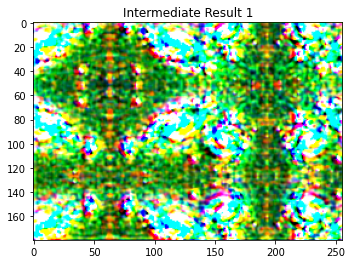

In [ ]:
img=Image.open('/content/drive/MyDrive/MemoryLane/Dataset_Human_Blur1/1 (1).jpg')
img = np.asarray( img, dtype="int32" )
img=img.reshape(1,720,1024,3)
out=vgg_model_1(img)[0]
plt.title('Intermediate Result 1')
plt.imshow(out[:,:,0:3]/255.)

In [ ]:
vgg_model_2=tf.keras.Model(inputs=vgg.inputs,outputs=vgg.get_layer(name='block4_conv4').output)

In [ ]:
for layer in vgg_model_1.layers:
  layer.trainable=False

for layer in vgg_model_2.layers:
  layer.trainable=False

In [ ]:
vgg_model_2.summary()

Model: "model_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_44 (InputLayer)        [(None, 720, 1024, 3)]    0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 720, 1024, 64)     1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 720, 1024, 64)     36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 360, 512, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 360, 512, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 360, 512, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 180, 256, 128)     0  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


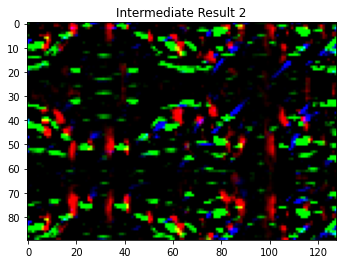

In [ ]:
img=Image.open('/content/drive/MyDrive/MemoryLane/Dataset_Human_Blur1/1 (1).jpg')
img = np.asarray( img, dtype="int32" )
img=img.reshape(1,720,1024,3)
out=vgg_model_2(img)[0]
plt.title('Intermediate Result 2')
plt.imshow(out[:,:,0:3]/255.)

**Creating Model**

In [ ]:
class SRGAN(keras.Model):
  def __init__(self,discriminator,generator):
    super(SRGAN, self).__init__()
    self.discriminator=discriminator
    self.generator=generator
  def compile(self, loss_fn,discriminator_op,generator_op):
    super(SRGAN, self).compile()
    self.loss_fn=loss_fn
    self.discriminator_op=discriminator_op
    self.generator_op=generator_op
  def train_step(self,data):
    input_images=data[0]
    target_images=data[1]
    batch_size=1
    print(input_images.shape)
    for k in range(1):
      ind=np.random.randint(low=0,high=16,size=batch_size)
      batch_real=tf.gather(target_images,ind)
      batch_fake=self.generator(tf.gather(input_images,ind))
      y_batch_real=np.ones((batch_size,1),dtype=np.float32)
      y_batch_fake=np.zeros((batch_size,1),dtype=np.float32)
      xtrain=tf.concat([batch_real,batch_fake],axis=0)
      ytrain=tf.concat([y_batch_real,y_batch_fake],axis=0)
      with tf.GradientTape() as tape:
        predictions=self.discriminator(xtrain)
        d_loss=self.loss_fn(ytrain,predictions)
      
      grads=tape.gradient(d_loss,self.discriminator.trainable_weights)
      self.discriminator_op.apply_gradients(
          zip(grads,self.discriminator.trainable_weights)
      )
    for k in range(5):
      misleading_labels=np.ones((batch_size,1),dtype=np.float32)
      ind=np.random.randint(low=0,high=16,size=batch_size)
      batch_fake=tf.gather(input_images,ind)
      target_sample=tf.gather(target_images,ind)
      with tf.GradientTape() as tape:
        generated_image=self.generator(batch_fake)
        vgg_1_real=vgg_model_1(target_sample)
        vgg_1_fake=vgg_model_1(generated_image)
        vgg_2_real=vgg_model_2(target_sample)
        vgg_2_fake=vgg_model_2(generated_image)
        predictions=self.discriminator(generated_image)
        g_loss=0.001*self.loss_fn(misleading_labels,predictions) 
        g_loss+=0.1*tf.keras.losses.MeanSquaredError()(vgg_2_real,vgg_2_fake)
        g_loss+=tf.keras.losses.MeanSquaredError()(vgg_1_real,vgg_1_fake)
        g_loss+=tf.keras.losses.MeanSquaredError()(self.generator(batch_fake),target_sample)
      grads=tape.gradient(g_loss,self.generator.trainable_weights)
      self.generator_op.apply_gradients(
          zip(grads,self.generator.trainable_weights)
      )

    return {'d_loss':d_loss,'g_loss':g_loss}


  def get_config(self):
    config = super(Linear, self).get_config()
    config.update({"units": self.units})
    return config


In [ ]:
dis=discriminator_model()
gen=generator_model()

gan=SRGAN(dis,gen)
gan.compile(
    discriminator_op=keras.optimizers.Adam(learning_rate=0.0003),
    generator_op=keras.optimizers.Adam(learning_rate=0.0003),
    loss_fn=keras.losses.BinaryCrossentropy()
)

**Fine Tuning of trained model**

In [ ]:
# dis.load_weights('/content/drive/MyDrive/SRGAN/dis_weight_final.h5')
# gen.load_weights('/content/drive/MyDrive/SRGAN/gen_weight_final.h5')
# for layer in list(gen.layers)[:-4]:
#   layer.trainable=False

# for layer in list(dis.layers)[:-4]:
#   layer.trainable=False

**Start Training**

In [ ]:
gan.fit(input_images_np/255.,target_images_np/255.,epochs=7,batch_size=10)

Epoch 1/30
(16, 180, 256, 3)
(16, 180, 256, 3)
30/30 [==============================] - 162s 4s/step - d_loss: 0.4613 - g_loss: 11.0768
Epoch 2/30
30/30 [==============================] - 133s 4s/step - d_loss: 0.3568 - g_loss: 9.1389
Epoch 3/30
30/30 [==============================] - 134s 4s/step - d_loss: 0.2082 - g_loss: 7.4931
Epoch 4/30
30/30 [==============================] - 133s 4s/step - d_loss: 0.8292 - g_loss: 10.6590
Epoch 5/30
30/30 [==============================] - 133s 4s/step - d_loss: 0.5030 - g_loss: 7.8433
Epoch 6/30
30/30 [==============================] - 134s 4s/step - d_loss: 0.1837 - g_loss: 8.2234
Epoch 7/30
30/30 [==============================] - 133s 4s/step - d_loss: 0.4951 - g_loss: 7.3395
Epoch 8/30
30/30 [==============================] - 133s 4s/step - d_loss: 0.2530 - g_loss: 9.7238
Epoch 9/30
30/30 [==============================] - 134s 4s/step - d_loss: 0.1642 - g_loss: 8.6886
Epoch 10/30
30/30 [==============================] - 133s 4s/step - d_l

**Testing**

255.0
0.0


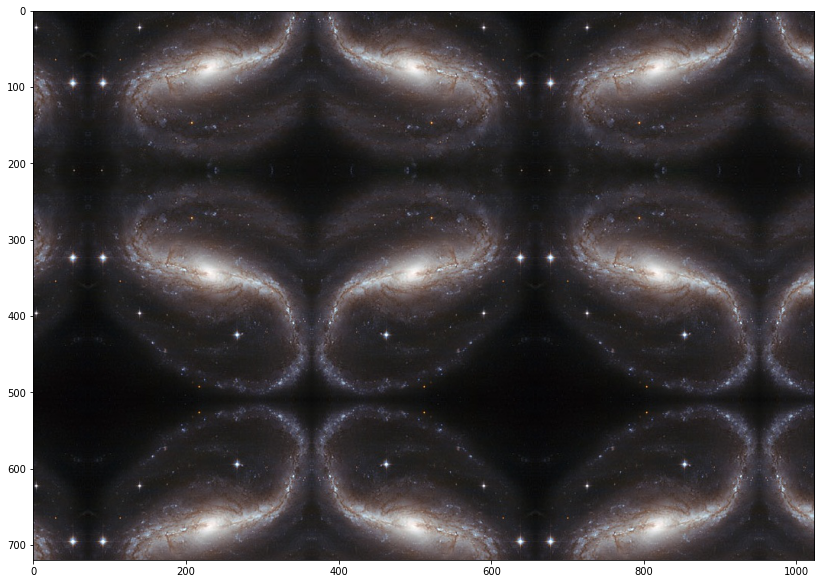

In [ ]:
u=77
print(target_images_np[u].max())
print(target_images_np[u].min())
plt.figure(figsize=(14,14))
plt.imshow(target_images_np[u]/255)

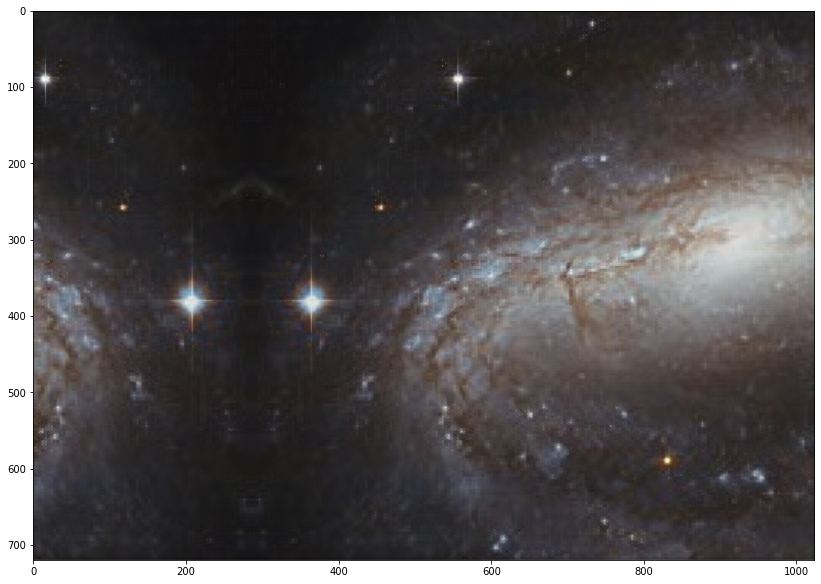

In [ ]:
out=gen.predict(target_images_np[u:u+1,:180,:256]/255)
plt.figure(figsize=(14,14))
plt.imshow((out[0]))

In [ ]:
dis.predict(target_images_np[u:u+1])

array([[1.]], dtype=float32)

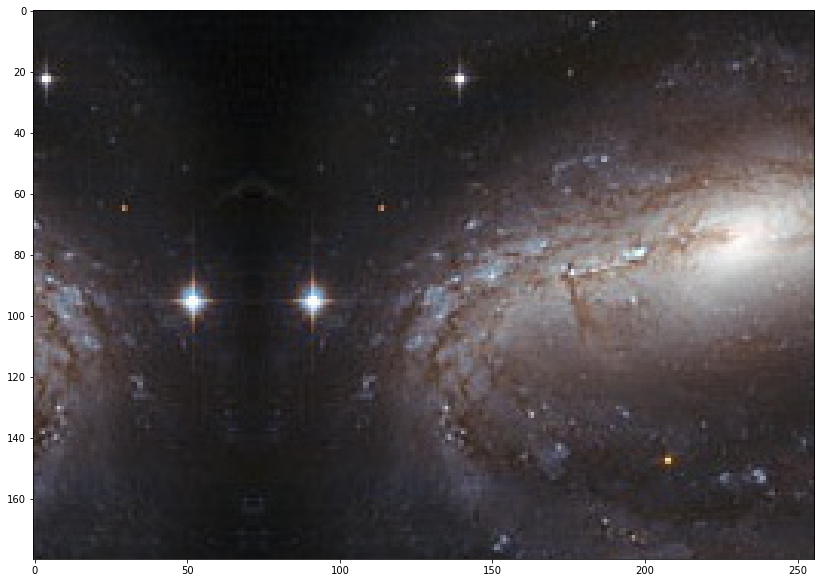

In [ ]:
out=target_images_np[u:u+1,:180,0:256+0]/255
plt.figure(figsize=(14,14))
plt.imshow((out[0]))

**Random Picture**

In [ ]:
path_to_img='/content/drive/MyDrive/MemoryLane/Dataset_Human_Sharp1/1 (1).jpg'
img=Image.open(path_to_img)
img = np.asarray( img, dtype="int32" )[:180:1,:256:1,:]
plt.figure(figsize=(14, 14))
plt.title('Test Image')
plt.axis('off')
plt.imshow(img)

NameError: ignored

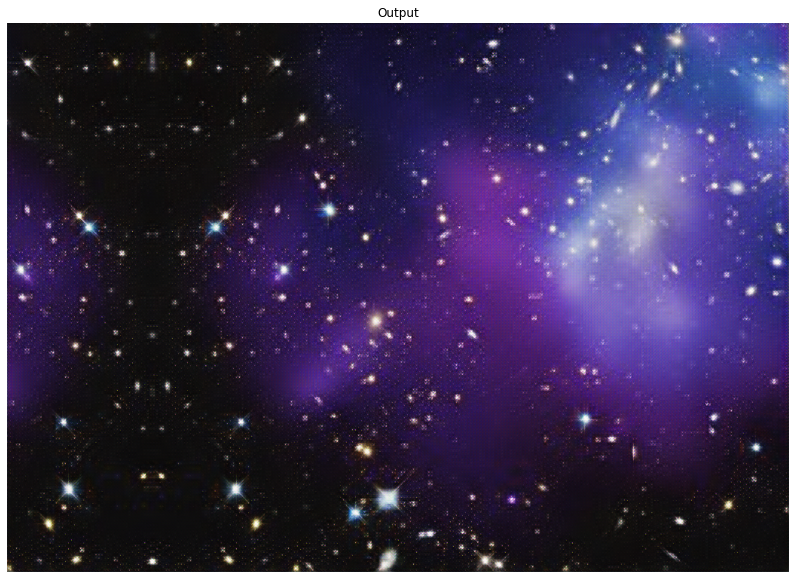

In [ ]:
out=gen(img.reshape(1,180,256,3)/255.)
plt.figure(figsize=(14, 14))
plt.title('Output')
plt.axis('off')
plt.imshow(out[0])

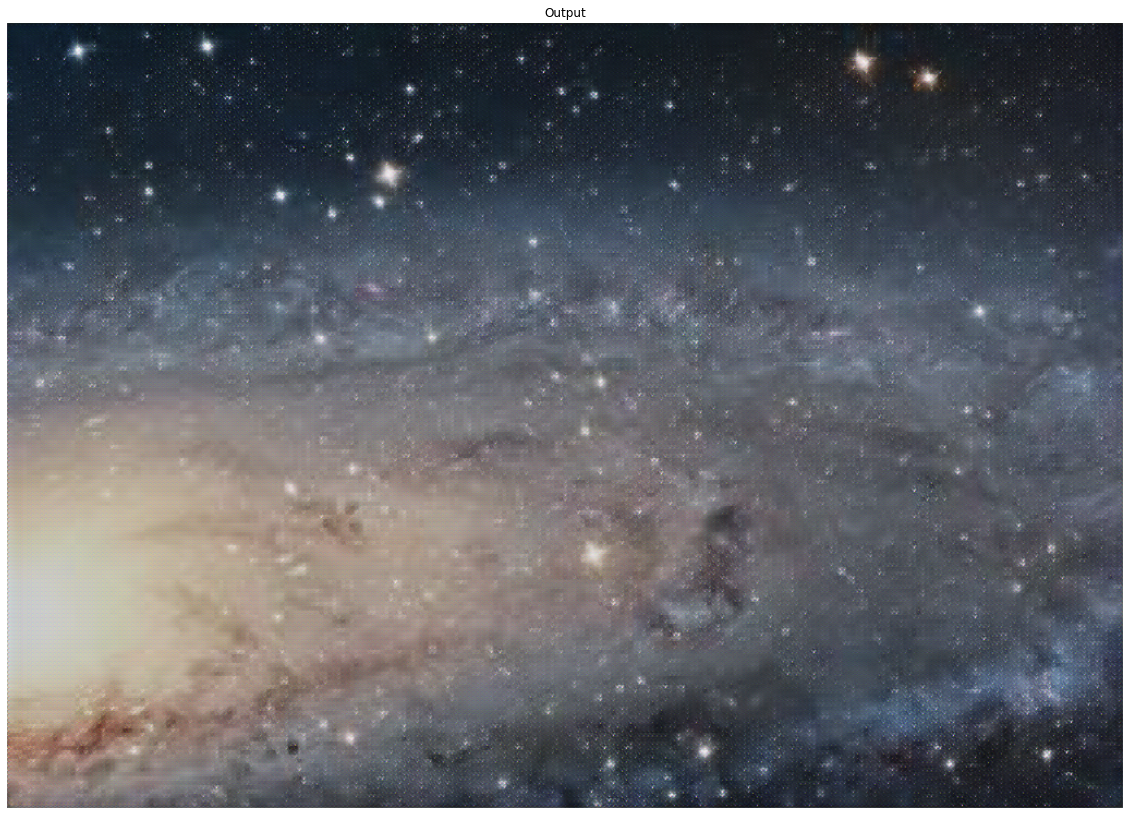

In [ ]:
plt.figure(figsize=(20, 20))

plt.title('Output')
plt.axis('off')
plt.imshow(out[0])

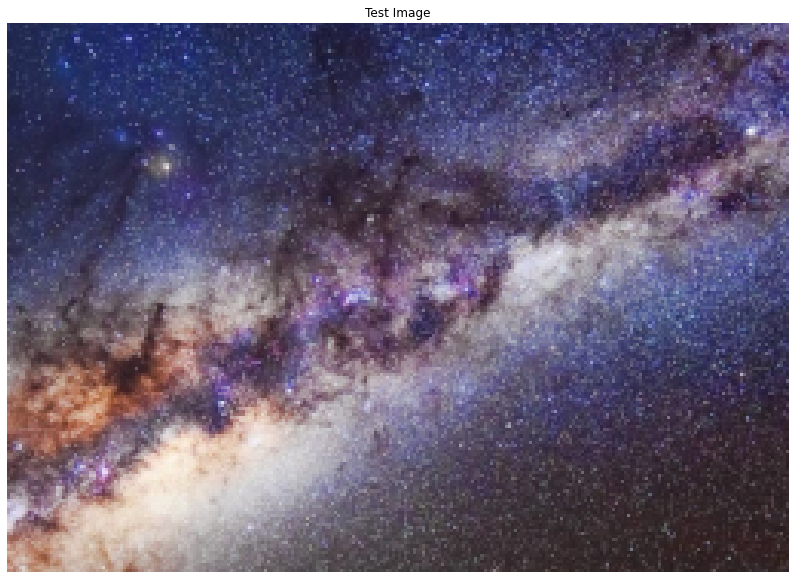

In [ ]:
img=Image.open('/content/drive/MyDrive/MemoryLane/Dataset_Human_Blur1/1 (1).jpg')
img = np.asarray( img, dtype="int32" )[::4,::4,:]
plt.figure(figsize=(14, 14))
plt.title('Test Image')
plt.axis('off')
plt.imshow(img)

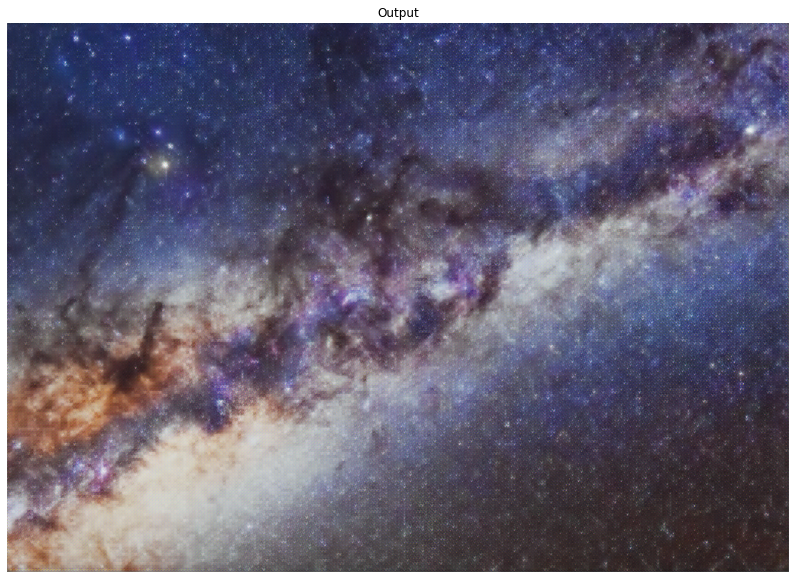

In [ ]:
out=gen(img.reshape(1,180,256,3)/255.)
plt.figure(figsize=(14, 14))
plt.title('Output')
plt.axis('off')
plt.imshow(out[0])

**Saving Model**

In [ ]:
gen.save_weights('/content/drive/MyDrive/SRGAN/gen_weight_final.h5')

In [ ]:
dis.save_weights('/content/drive/MyDrive/SRGAN/dis_weight_final.h5')